<a href="https://colab.research.google.com/github/tejasnikumbh999/Task_Guvi/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [146]:
f1=pd.read_csv('https://raw.githubusercontent.com/tejasnikumbh999/Task_Guvi/main/takehome_user_engagement.csv')

In [147]:
f2=pd.read_csv('https://raw.githubusercontent.com/tejasnikumbh999/Task_Guvi/main/takehome_users.csv',encoding='latin-1')

In [148]:
f1.columns

Index(['time_stamp', 'user_id', 'visited'], dtype='object')

In [149]:
f2.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

- Rename object_id by user_id to merge the two files

In [150]:
f2 = f2.rename(columns = {'object_id': 'user_id'}, inplace = False)

In [151]:
#merge the files

takehome = pd.merge(f1, f2, on='user_id')

In [155]:
takehome.head()

,time_stamp,user_id,visited,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0


#EDA

In [61]:
#check null values

takehome.isnull().sum()

time_stamp                        0
user_id                           0
visited                           0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time        0
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            91030
dtype: int64

- The column invited_by_user_id has null values, thus delete the column.

In [62]:
takehome.drop(columns='invited_by_user_id',inplace=True)

In [153]:
takehome.dtypes

time_stamp                     object
user_id                         int64
visited                         int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [154]:
#convert data types

takehome['creation_time']=pd.to_datetime(takehome['creation_time'])
takehome['time_stamp']=pd.to_datetime(takehome['time_stamp'])
takehome['last_session_creation_time']= pd.to_datetime(takehome['last_session_creation_time'],unit='s')

In [193]:
#sort data weekly, monthly and yearly

takehome['Week_number'] = takehome['last_session_creation_time'].dt.week
takehome['week'] = takehome['last_session_creation_time'].dt.year.astype(str) + takehome['last_session_creation_time'].dt.week.astype(str)
takehome['year']=takehome['last_session_creation_time'].dt.year
takehome['month']=takehome['last_session_creation_time'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [194]:
takehome.head()

,time_stamp,user_id,visited,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Week_number,week,year,month
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,17,201417,2014,4
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,14,201414,2014,3
2,2013-11-29 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,14,201414,2014,3
3,2013-12-09 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,14,201414,2014,3
4,2013-12-25 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,14,201414,2014,3


- Week_number assigns the week for a particular year and may be same for same day on next year.
- week represents the cumulative week and is unique for each year.

In [203]:
#Group the data by week

Group = takehome.groupby(['user_id','org_id','creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','Week_number','week','month','year'])['visited'].count().reset_index()

In [204]:
#create the dataset of the users wher weekly visits are greater than 3

Group['adopted_user'] = Group['visited'].apply(lambda x: 'yes' if x >= 3 else 'no')

In [205]:
Group

,user_id,org_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,Week_number,week,month,year,visited,adopted_user
0,1,11,GUEST_INVITE,1,0,17,201417,4,2014,1,no
1,2,1,ORG_INVITE,0,0,14,201414,3,2014,14,yes
2,3,94,ORG_INVITE,0,0,12,201312,3,2013,1,no
3,4,1,GUEST_INVITE,0,0,21,201321,5,2013,1,no
4,5,193,GUEST_INVITE,0,0,4,20134,1,2013,1,no
...,...,...,...,...,...,...,...,...,...,...,...
8818,11996,89,ORG_INVITE,0,0,36,201336,9,2013,1,no
8819,11997,200,SIGNUP_GOOGLE_AUTH,0,0,3,20133,1,2013,1,no
8820,11998,83,GUEST_INVITE,1,1,17,201417,4,2014,1,no
8821,11999,6,PERSONAL_PROJECTS,0,0,22,201222,6,2012,1,no


#Data Visualization

In [206]:
fig = px.pie(Group, names='adopted_user', title='Adopted Users')
fig.show()

- Around 25% of the users are abopted i.e they are used to login more than three time in a week.

#Machine Learning

- Lable encoding

In [207]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [208]:
for column in Group.columns:
  if Group[column].dtype == object:
    Group[column] = le.fit_transform(Group[column])

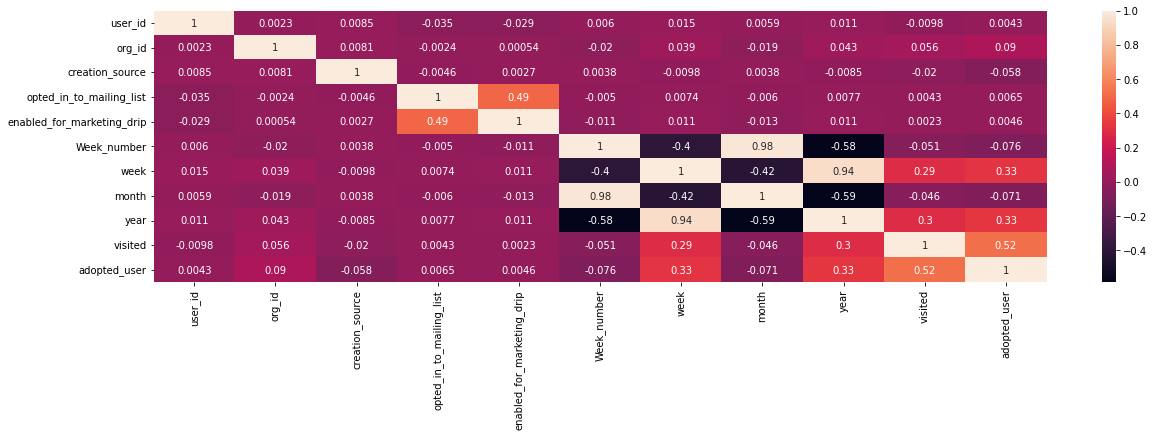

In [209]:
plt.figure(figsize=(20,5))
sns.heatmap(Group.corr(),annot=True)

In [277]:
from sklearn.model_selection import train_test_split
X=Group.drop(columns=['user_id','adopted_user','visited','year','Week_number'],axis=1)
Y=Group['adopted_user']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=60)

- Random Forest

In [278]:
from sklearn.ensemble import RandomForestClassifier 
randomforest=RandomForestClassifier(max_depth=7,n_estimators=35,random_state=3)
randomforest.fit(x_train,y_train)
y_pred=randomforest.predict(x_test)
score=randomforest.score(x_test,y_test)
score*100

85.64412542500945

- XGBoost Algorithm

In [279]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=2,n_estimators=100)
xgb.fit(x_train,y_train)
 
xgb_score = xgb.score(x_test,y_test)*100
print("XGBoost  Score is :",xgb_score)

XGBoost  Score is : 85.60634680770683


In [280]:
#predict feature importance

feature_scores = pd.Series(randomforest.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores = feature_scores*100
feature_scores


week                          61.966124
month                         26.078389
org_id                         8.136616
creation_source                2.282243
enabled_for_marketing_drip     0.804732
opted_in_to_mailing_list       0.731896
dtype: float64

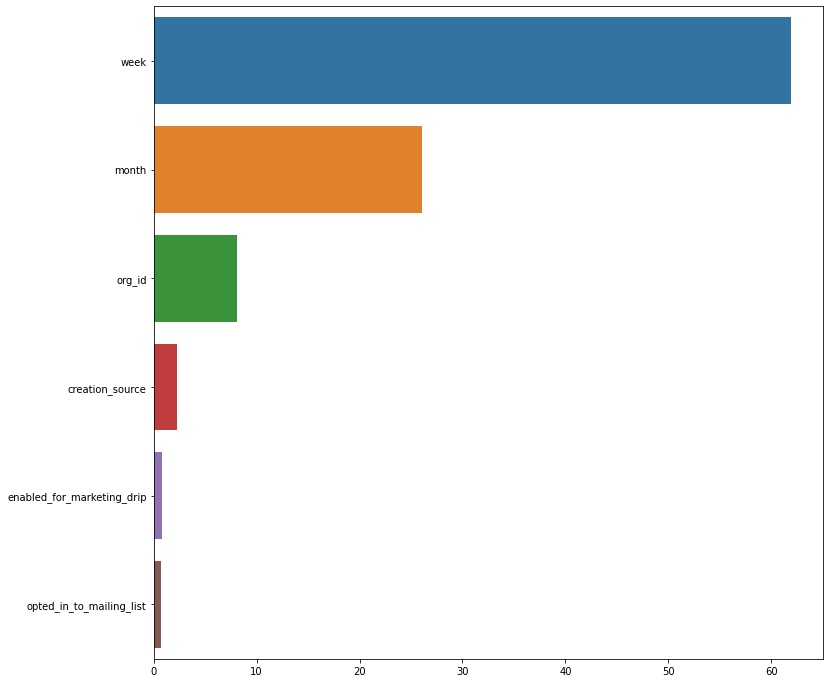

In [281]:
#plot feature importance

plt.figure(figsize=(12,12))
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.show()

- Thus the feature importance is as listed:

week >  month > org_id > creation_source > enabled_for_marketing_drip > opted_in_to_mailing_list	